In [1]:
# ! pip install mne

In [47]:
%matplotlib notebook
# %matplotlib inline

import mne
import numpy as np
import matplotlib.pyplot as plt

In [48]:
fname = "oddball_example_small-fif.gz"

In [49]:
raw = mne.io.read_raw_fif(fname)

Opening raw data file oddball_example_small-fif.gz...
Isotrak not found


/var/folders/7j/4xfw289x301dk2mmvrzh_m7h0000gn/T/ipykernel_29221/2771926147.py:1: RuntimeWarning: This filename (oddball_example_small-fif.gz) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fname)


    Range : 2903 ... 112000 =     29.030 ...  1120.000 secs
Ready.


raw. # tab

In [50]:
print(raw.info)

<Info | 10 non-empty values
 bads: []
 ch_names: FP1, FP2, F7, F3, Fz, F4, F8, FC5, FC1, FC2, FC6, T7, C3, Cz, ...
 chs: 63 EEG, 1 Stimulus
 custom_ref_applied: True
 file_id: 4 items (dict)
 highpass: 0.1 Hz
 lowpass: 30.0 Hz
 meas_date: 2017-08-10 20:05:16 UTC
 meas_id: 4 items (dict)
 nchan: 64
 projs: []
 sfreq: 100.0 Hz
>


In [51]:
dir(raw)

['__class__',
 '__contains__',
 '__del__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__slotnames__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_annotations',
 '_cals',
 '_check_bad_segment',
 '_comp',
 '_cropped_samp',
 '_dtype',
 '_dtype_',
 '_filenames',
 '_first_samps',
 '_first_time',
 '_get_buffer_size',
 '_get_channel_positions',
 '_getitem',
 '_handle_tmin_tmax',
 '_init_kwargs',
 '_last_samps',
 '_last_time',
 '_orig_units',
 '_parse_get_set_params',
 '_pick_drop_channels',
 '_pick_projs',
 '_preload_data',
 '_projector',
 '_projectors',
 '_raw_extras',
 '_raw_lengths',
 '_read_comp_grade',
 '_read_picks',
 '_read_raw_file',
 '_read_segm

In [52]:
data = raw.get_data()
data

array([[-9.32739509e-06, -8.24539032e-06, -7.28968309e-06, ...,
        -1.41892200e-04, -1.43394726e-04, -1.38582035e-04],
       [-2.18217454e-05, -2.36475378e-05, -1.98818208e-05, ...,
        -1.55406983e-04, -1.57859353e-04, -1.52741747e-04],
       [ 4.19842551e-06,  4.91428444e-06,  4.42342177e-06, ...,
        -4.25878715e-05, -4.74130160e-05, -4.79076909e-05],
       ...,
       [-1.08992581e-05, -1.06960726e-05, -6.96709768e-06, ...,
        -2.89981782e-05, -2.90598608e-05, -2.91277251e-05],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-5.36788230e-06, -7.00320379e-06, -4.58933391e-06, ...,
        -5.40008805e-05, -5.84961344e-05, -5.74165570e-05]])

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 2.560 (s)


<IPython.core.display.Javascript object>


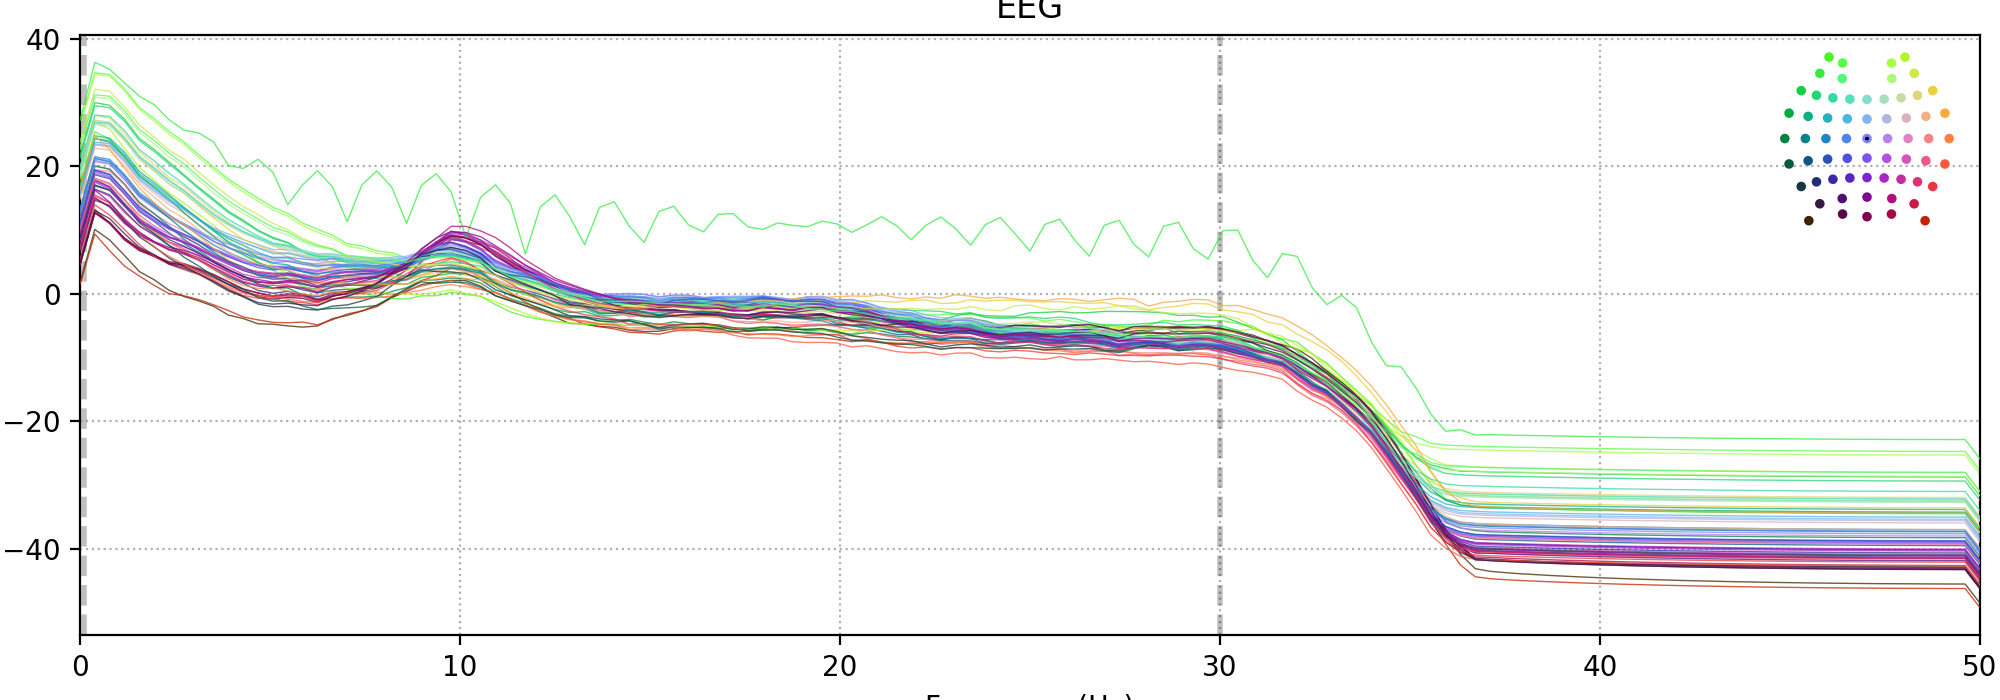

Figure(1000x350)


In [53]:
print(raw.plot_psd())

<IPython.core.display.Javascript object>


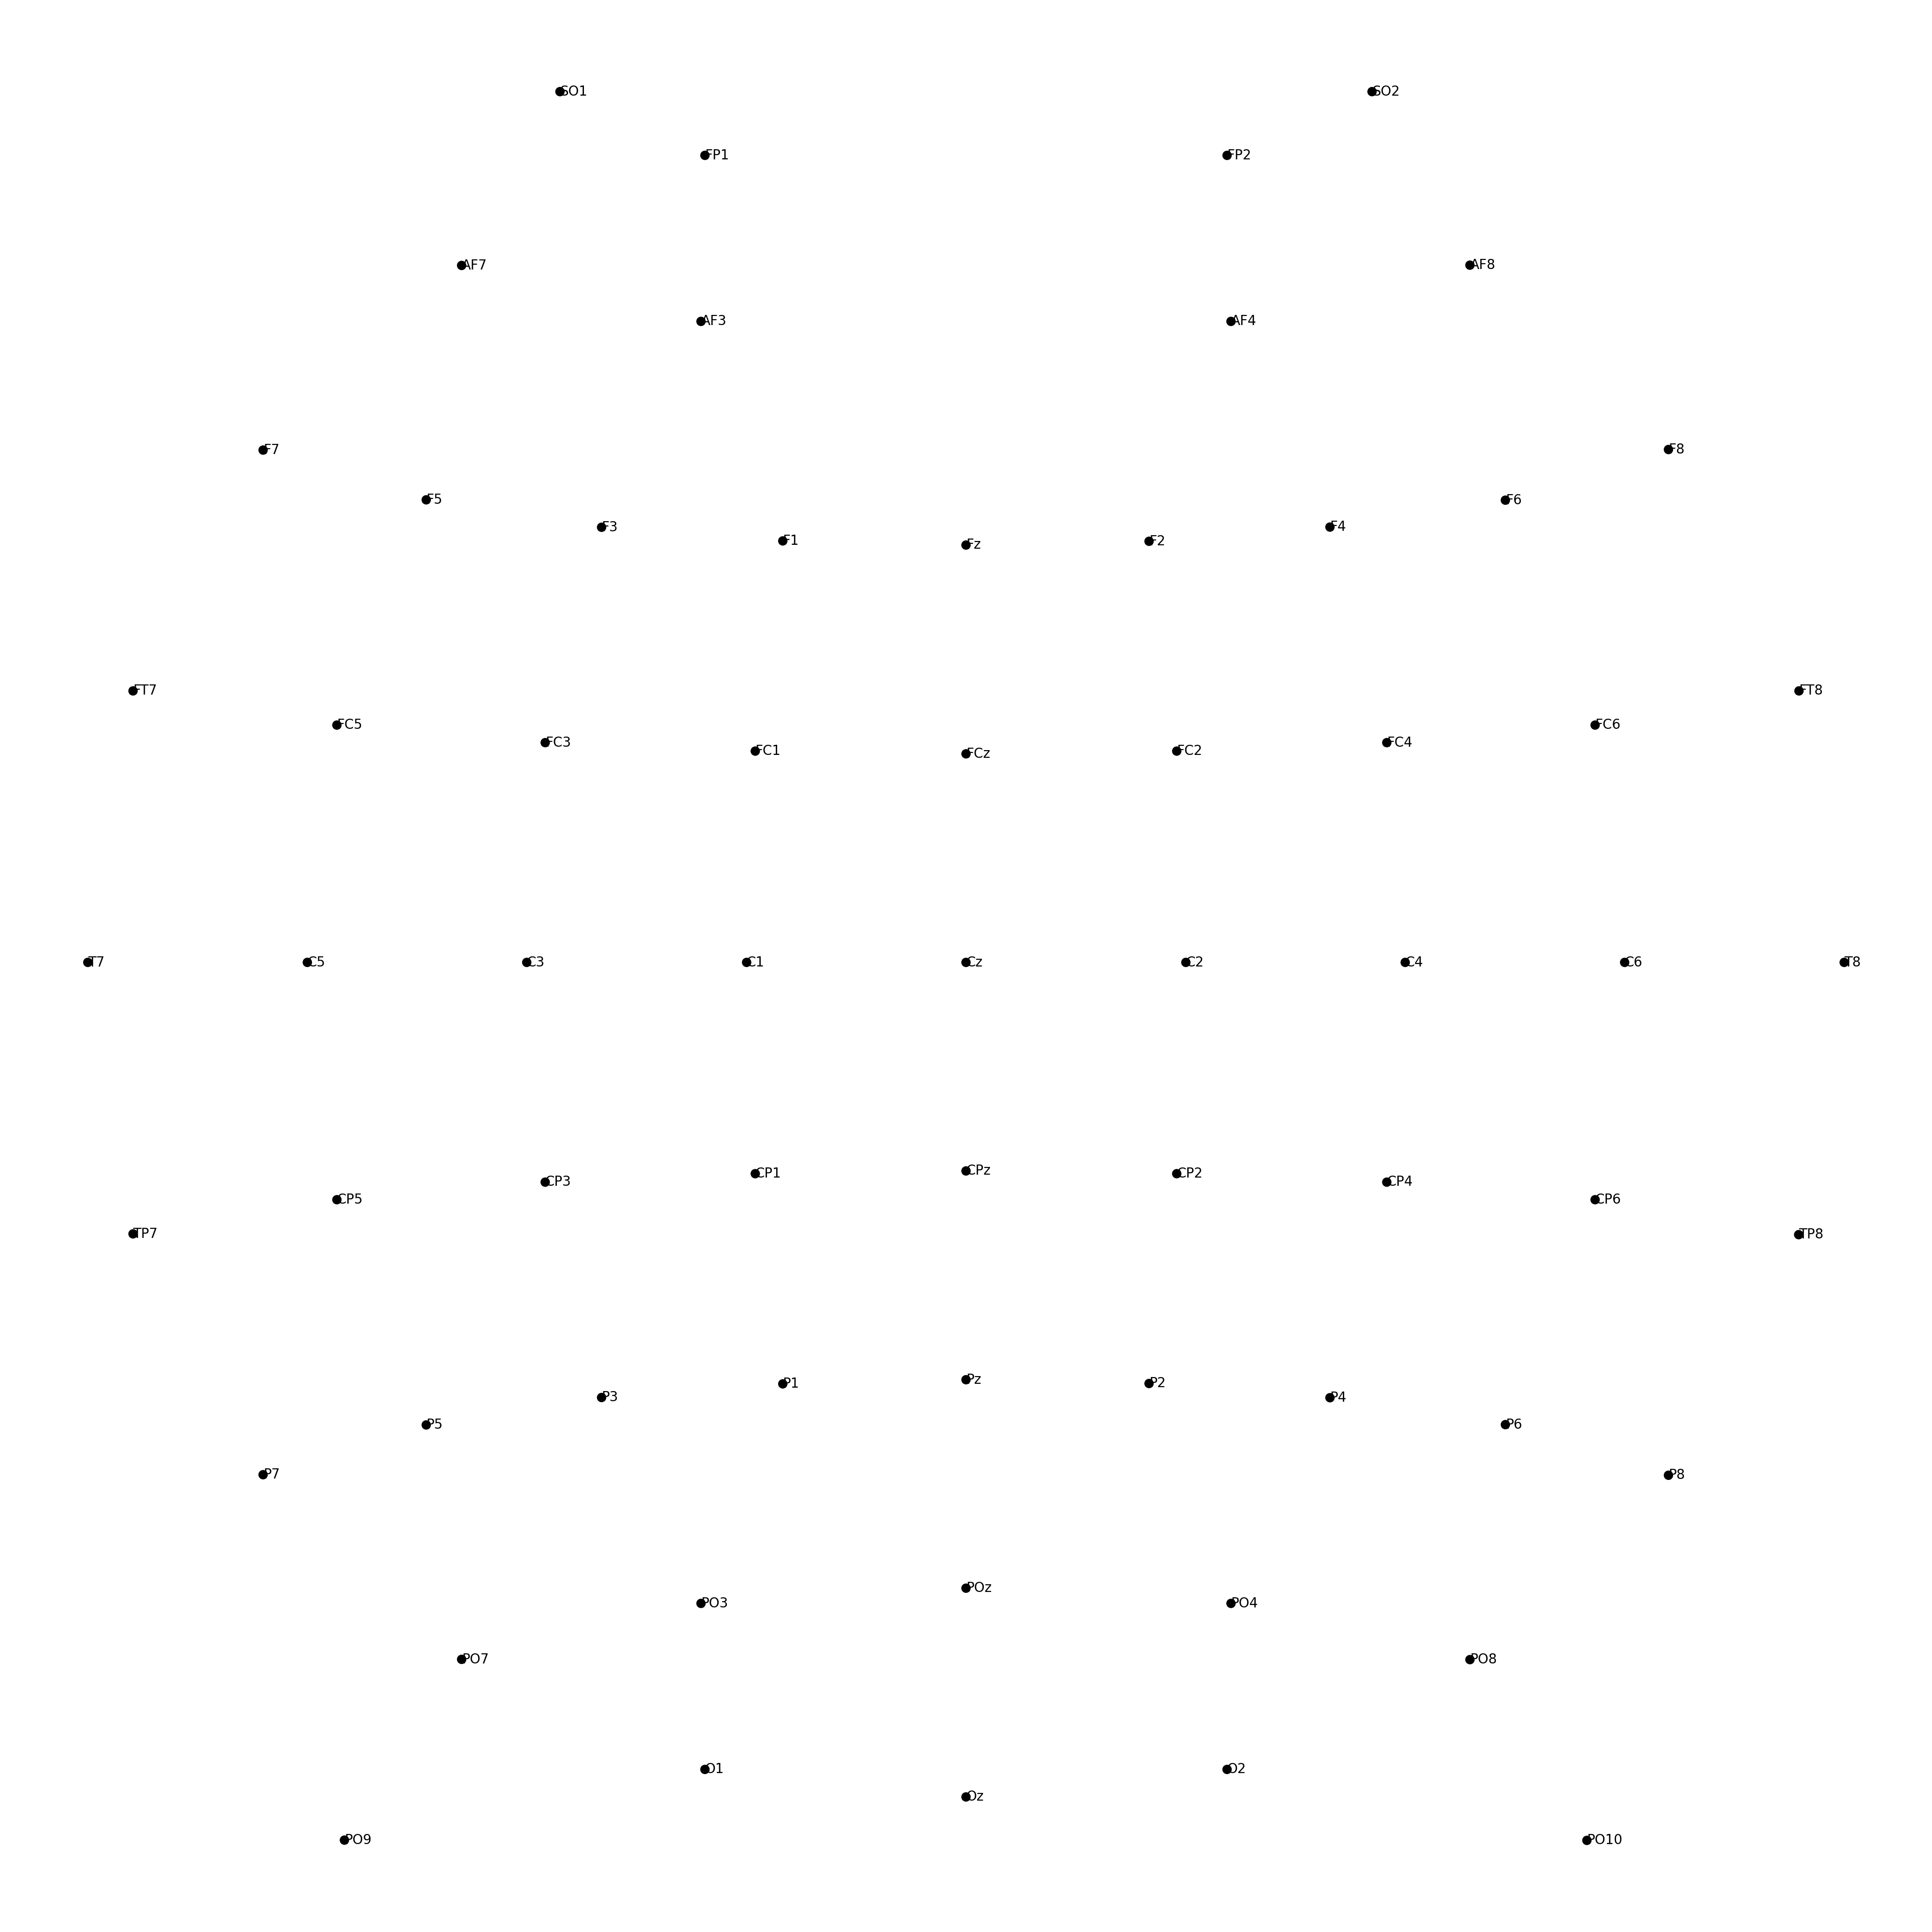

Figure(2000x2000)


In [68]:
print(raw.plot_sensors(ch_type='eeg', show_names=True))

In [69]:
raw.filter(1,20) # mne 왈 raw 객체를 메모리에 저장하지 않는대

RuntimeError: By default, MNE does not load data into main memory to conserve resources. inst.filter requires raw data to be loaded. Use preload=True (or string) in the constructor or raw.load_data().

In [70]:
raw = mne.io.read_raw_fif(fname, preload=True)

Opening raw data file oddball_example_small-fif.gz...
Isotrak not found
    Range : 2903 ... 112000 =     29.030 ...  1120.000 secs
Ready.
Reading 0 ... 109097  =      0.000 ...  1090.970 secs...


/var/folders/7j/4xfw289x301dk2mmvrzh_m7h0000gn/T/ipykernel_29221/67999550.py:1: RuntimeWarning: This filename (oddball_example_small-fif.gz) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fname, preload=True)


In [71]:
raw.load_data()

<Raw | oddball_example_small-fif.gz, 64 x 109098 (1091.0 s), ~53.3 MB, data loaded>

---

## 아티팩트 제거 

<a href="https://mne.tools/1.1/auto_tutorials/preprocessing/40_artifact_correction_ica.html#sphx-glr-auto-tutorials-preprocessing-40-artifact-correction-ica-py">mne.preprocessing.ICA</a>

In [72]:
ica = mne.preprocessing.ICA(n_components=20, random_state=0)

In [73]:
ica.fit(raw.copy().filter(8,30))

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 165 samples (1.650 sec)

Fitting ICA to data using 63 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  63 out of  63 | elapsed:    0.2s finished


Selecting by number: 20 components
Fitting ICA took 11.2s.


<ICA | raw data decomposition, method: fastica (fit in 35 iterations on 109098 samples), 20 ICA components (63 PCA components available), channel types: eeg, no sources marked for exclusion>

<IPython.core.display.Javascript object>


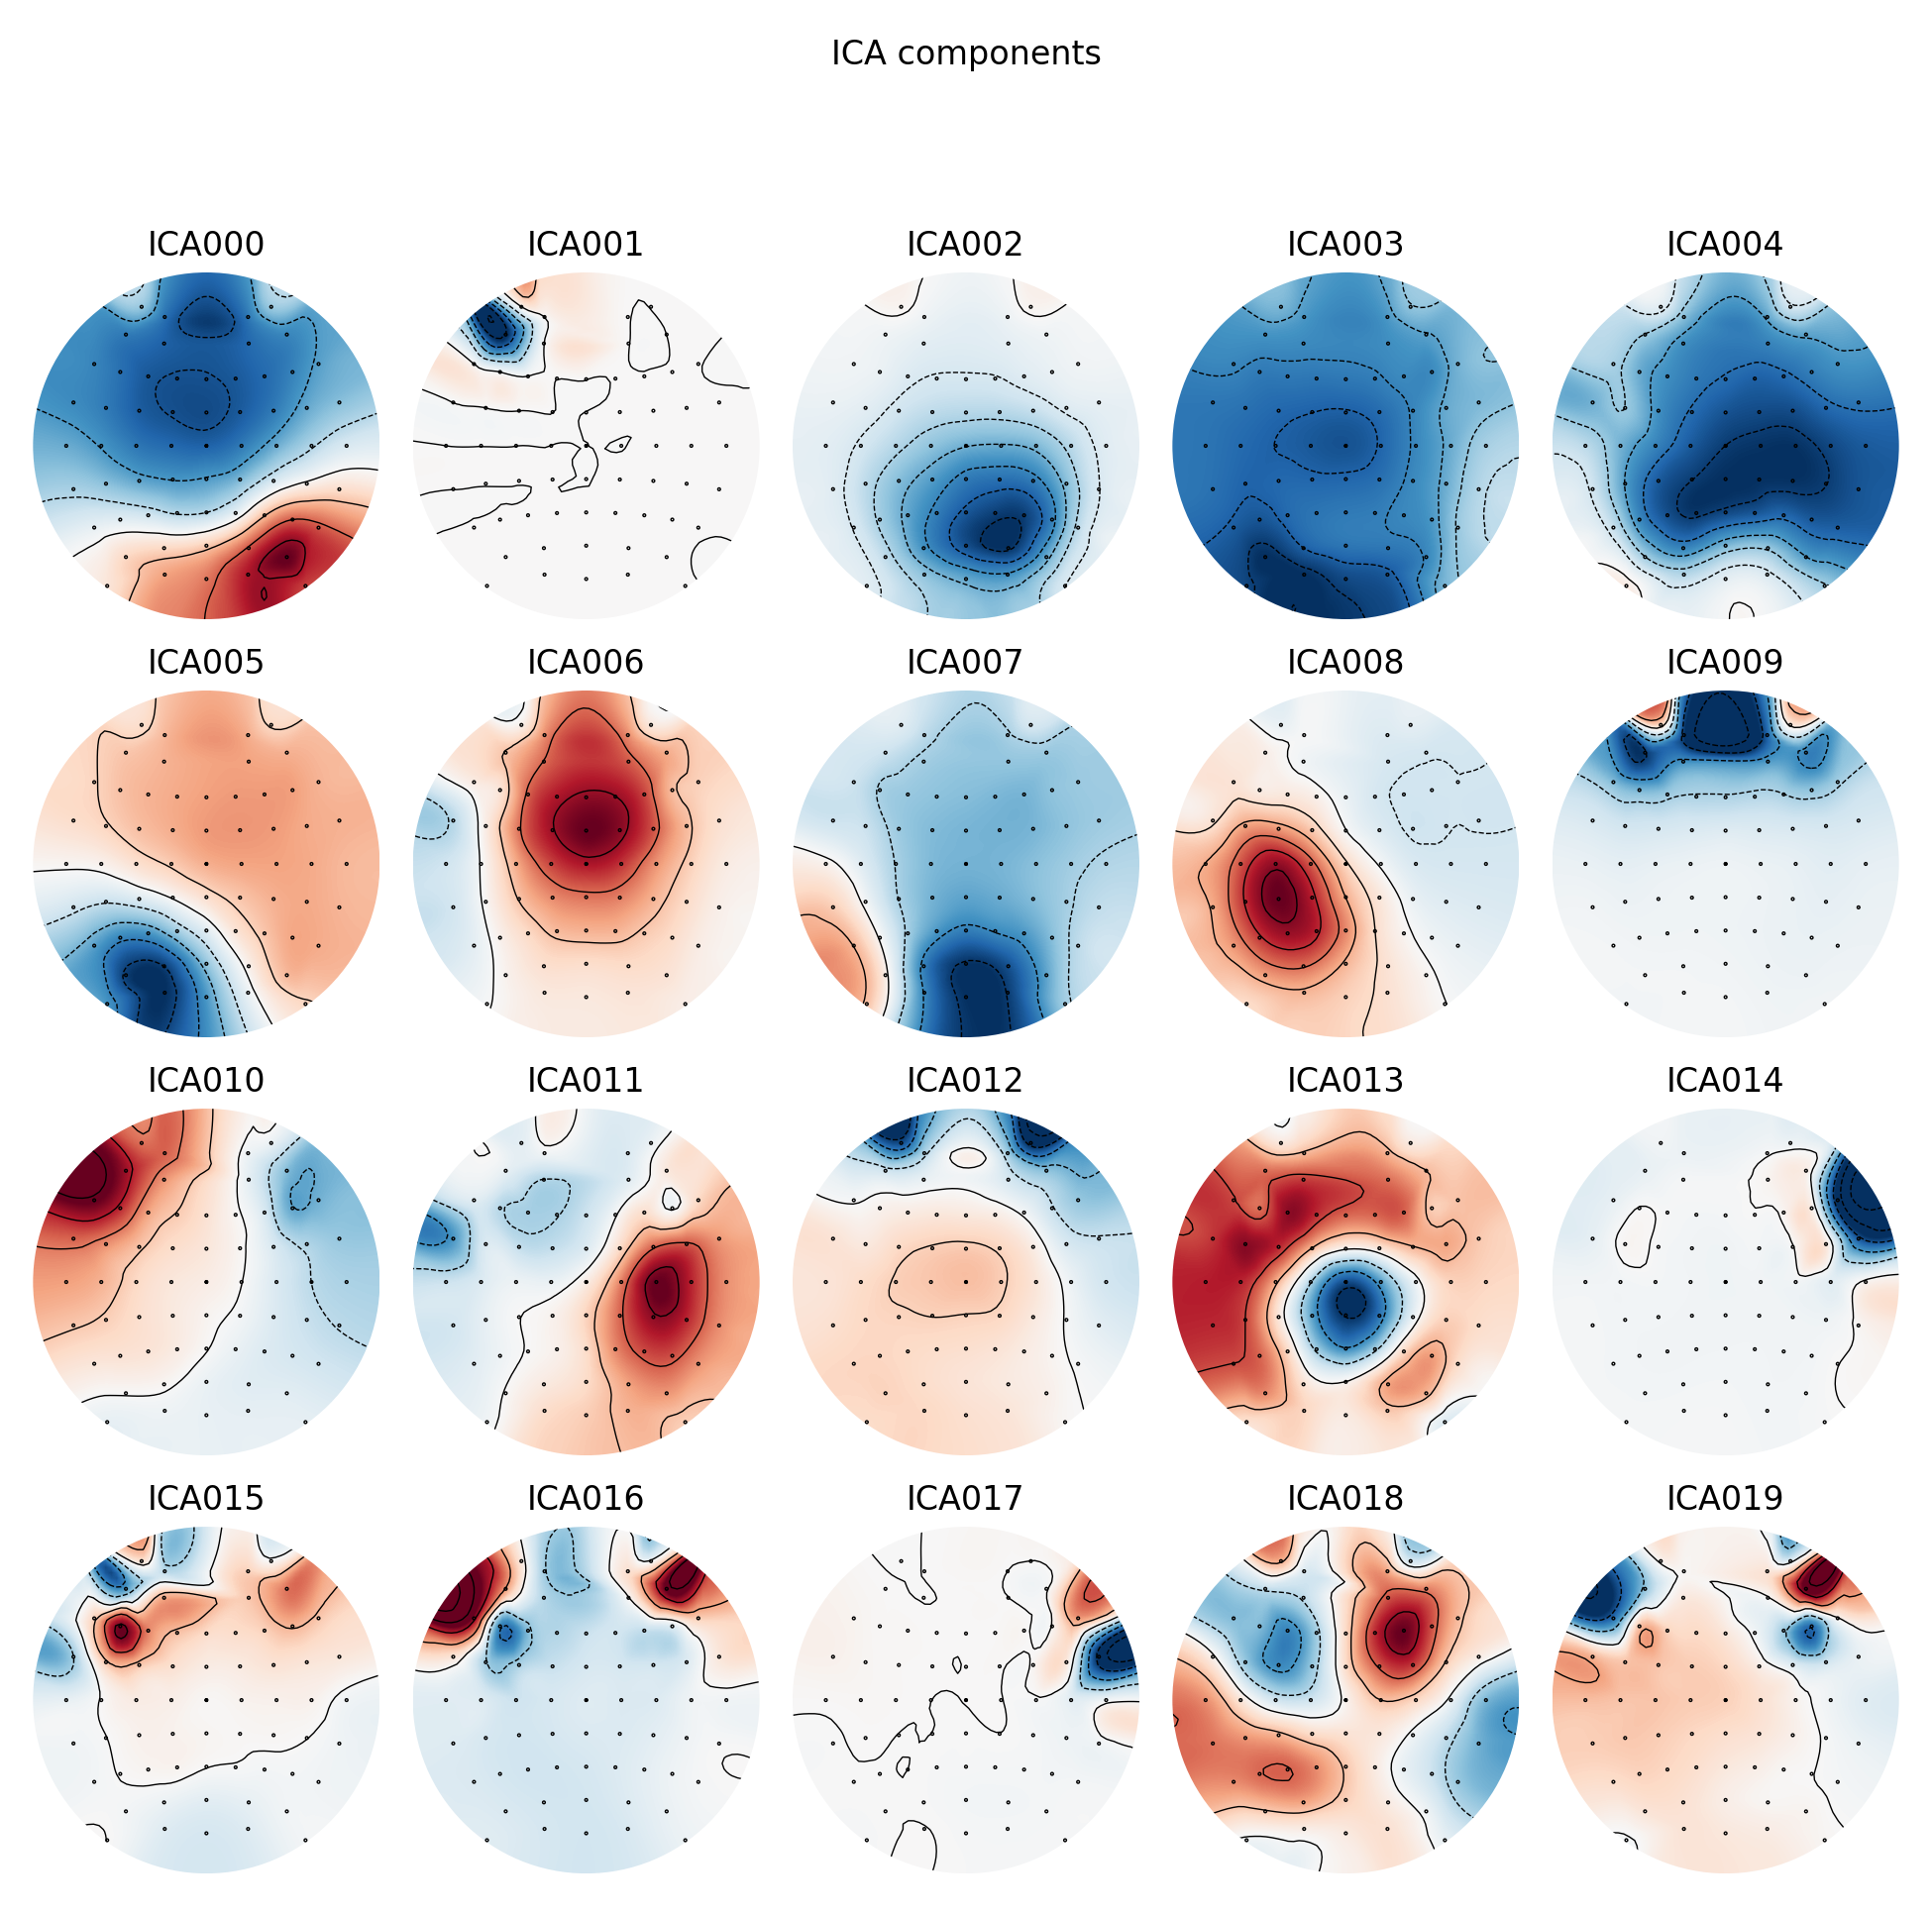

[<MNEFigure size 975x967 with 20 Axes>]


In [74]:
print(ica.plot_components())

In [75]:
# bad components 수동제거
ica.exclude = [12, 9]

In [76]:
# bad components 자동제거
bad_idx, scores = ica.find_bads_eog(raw, 'SO2', threshold=2)
print(bad_idx)

Using EOG channel: SO2
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 1000 samples (10.000 sec)

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 2 ICA components
    Projecting back using 63 PCA components


<IPython.core.display.Javascript object>


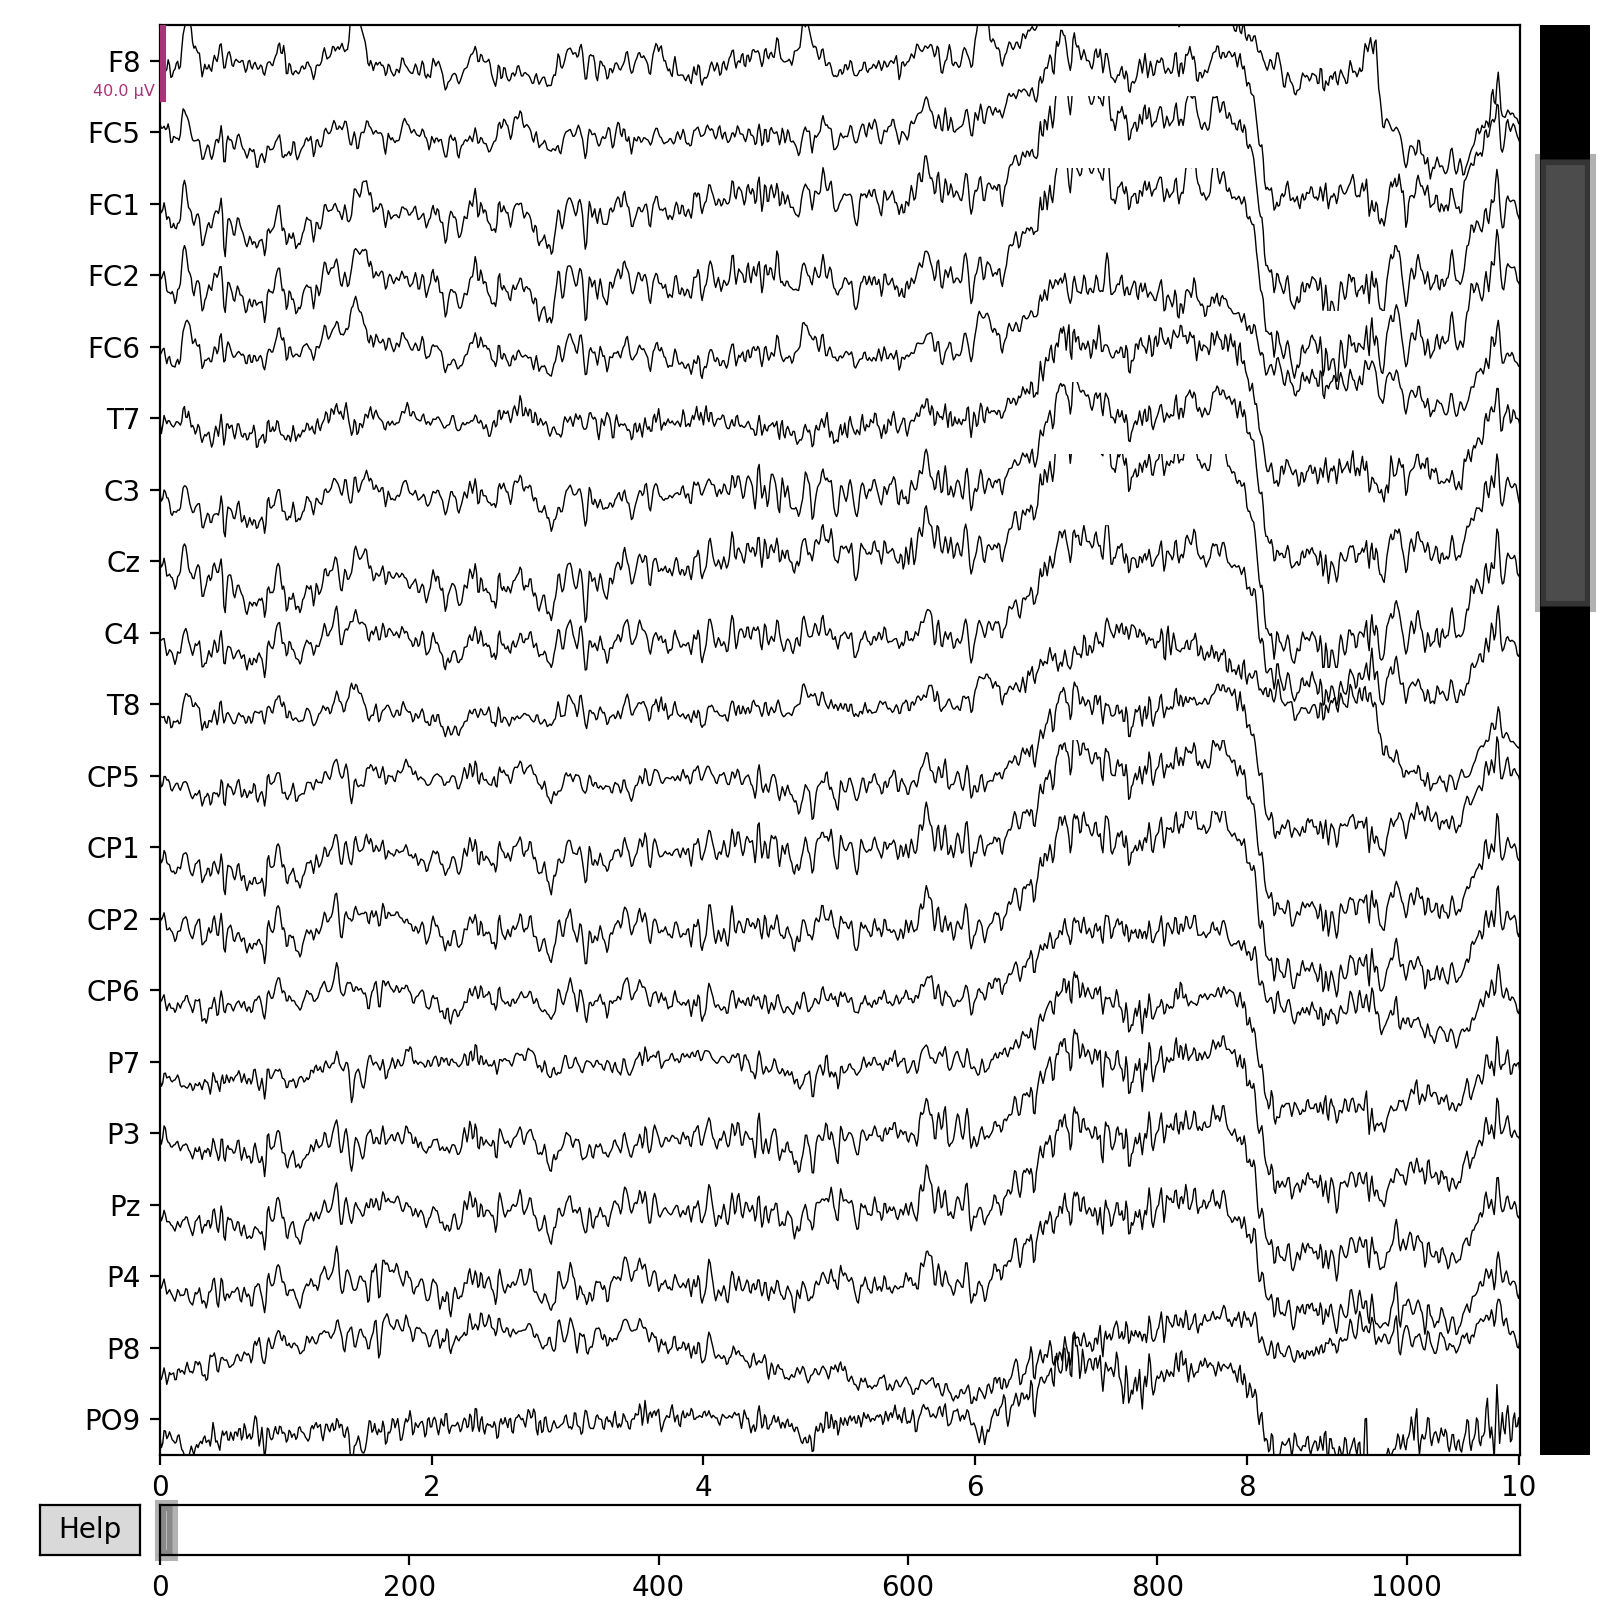

In [77]:
ica.apply(raw.copy(), exclude=ica.exclude).plot();

---

## event

In [60]:
events = mne.find_events(raw)

903 events found
Event IDs: [100 200]


In [61]:
events # (time in samples, zero, trigger);

array([[  3241,      0,    200],
       [  3437,      0,    200],
       [  3643,      0,    200],
       ...,
       [111496,      0,    200],
       [111613,      0,    200],
       [111719,      0,    200]])

In [62]:
events.shape

(903, 3)

In [63]:
event_ids = {"standard/stim": 200, "target/stim": 100}

<IPython.core.display.Javascript object>


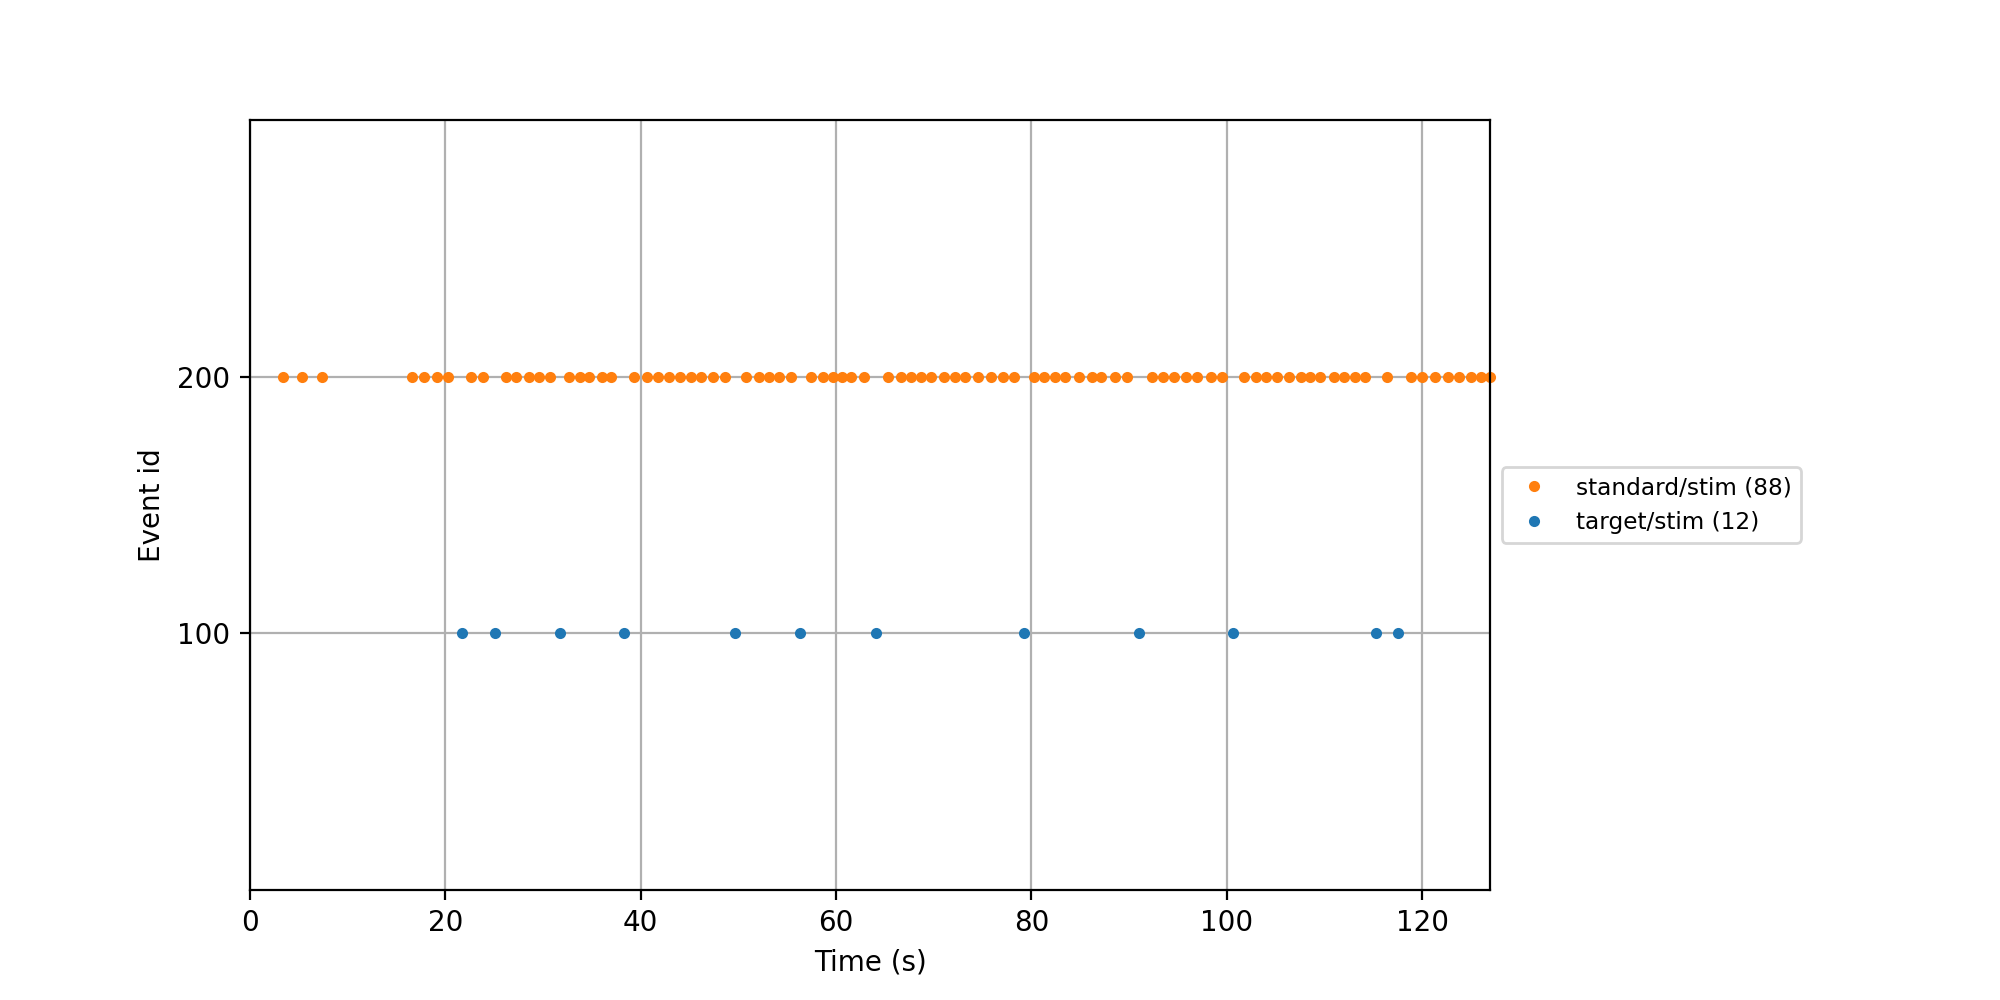

In [64]:
plt.rcParams['figure.figsize']=10,5
mne.viz.plot_events(events[:100], event_id=event_ids, sfreq=raw.info['sfreq'], first_samp=raw.first_samp);

In [65]:
epochs = mne.Epochs(raw, events, event_id=event_ids, preload=True)

Not setting metadata
903 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 903 events and 71 original time points ...
0 bad epochs dropped


<IPython.core.display.Javascript object>


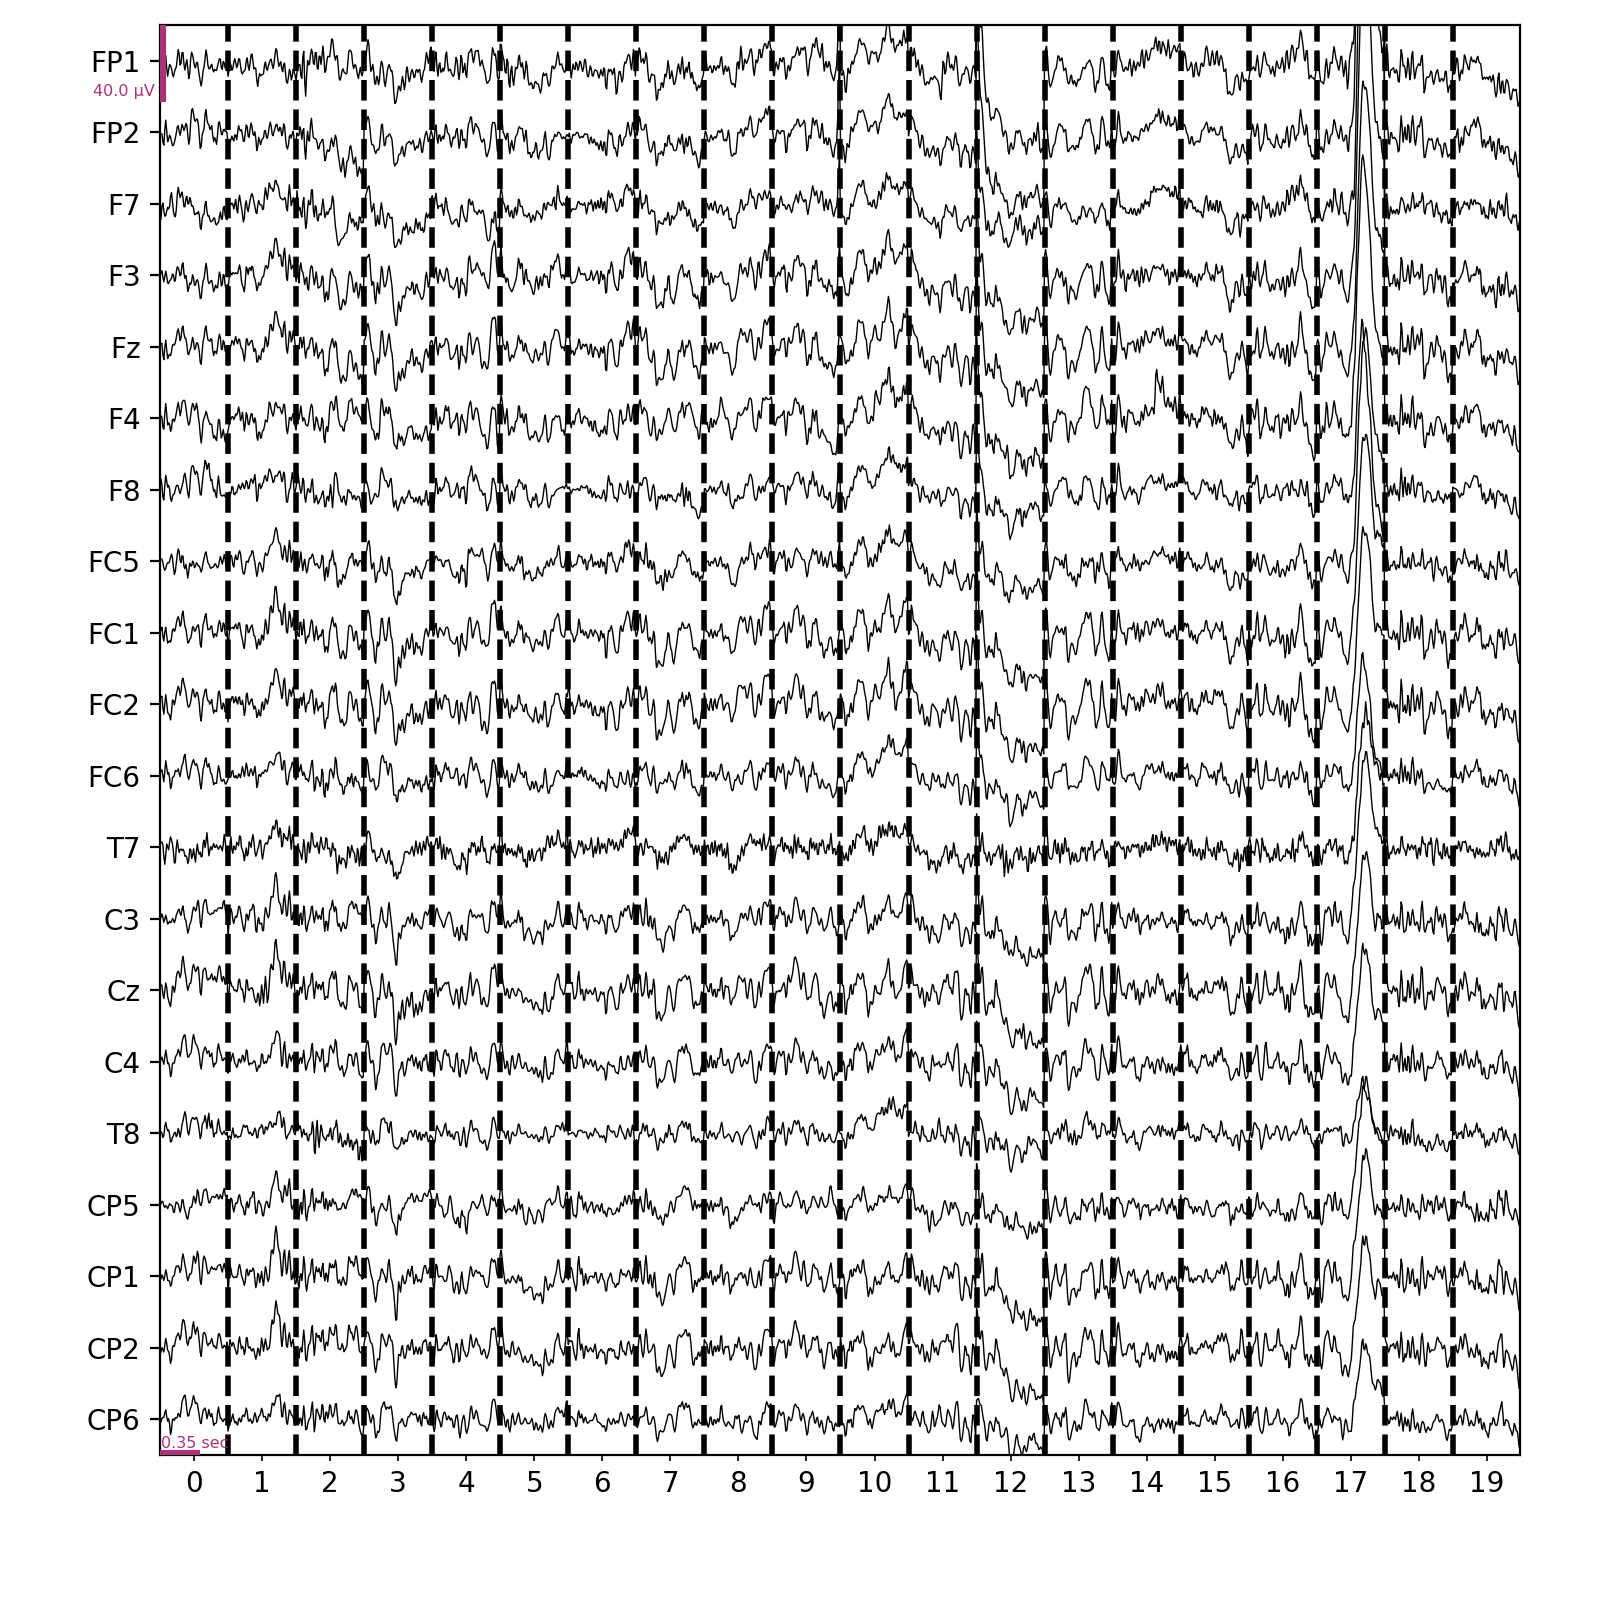

In [66]:
plt.rcParams['figure.figsize']=20,10
epochs.plot();

In [79]:
epochs = ica.apply(epochs, exclude=ica.exclude)

Applying ICA to Epochs instance
    Transforming to ICA space (20 components)
    Zeroing out 2 ICA components
    Projecting back using 63 PCA components


/var/folders/7j/4xfw289x301dk2mmvrzh_m7h0000gn/T/ipykernel_29221/3077353632.py:1: RuntimeWarning: The data you passed to ICA.apply() was baseline-corrected. Please note that ICA can introduce DC shifts, therefore you may wish to consider baseline-correcting the cleaned data again.
  epochs = ica.apply(epochs, exclude=ica.exclude)


In [80]:
epochs["stim"]

<Epochs |  903 events (all good), -0.2 - 0.5 sec, baseline -0.2 – 0 sec, ~31.4 MB, data loaded,
 'standard/stim': 797
 'target/stim': 106>

<IPython.core.display.Javascript object>


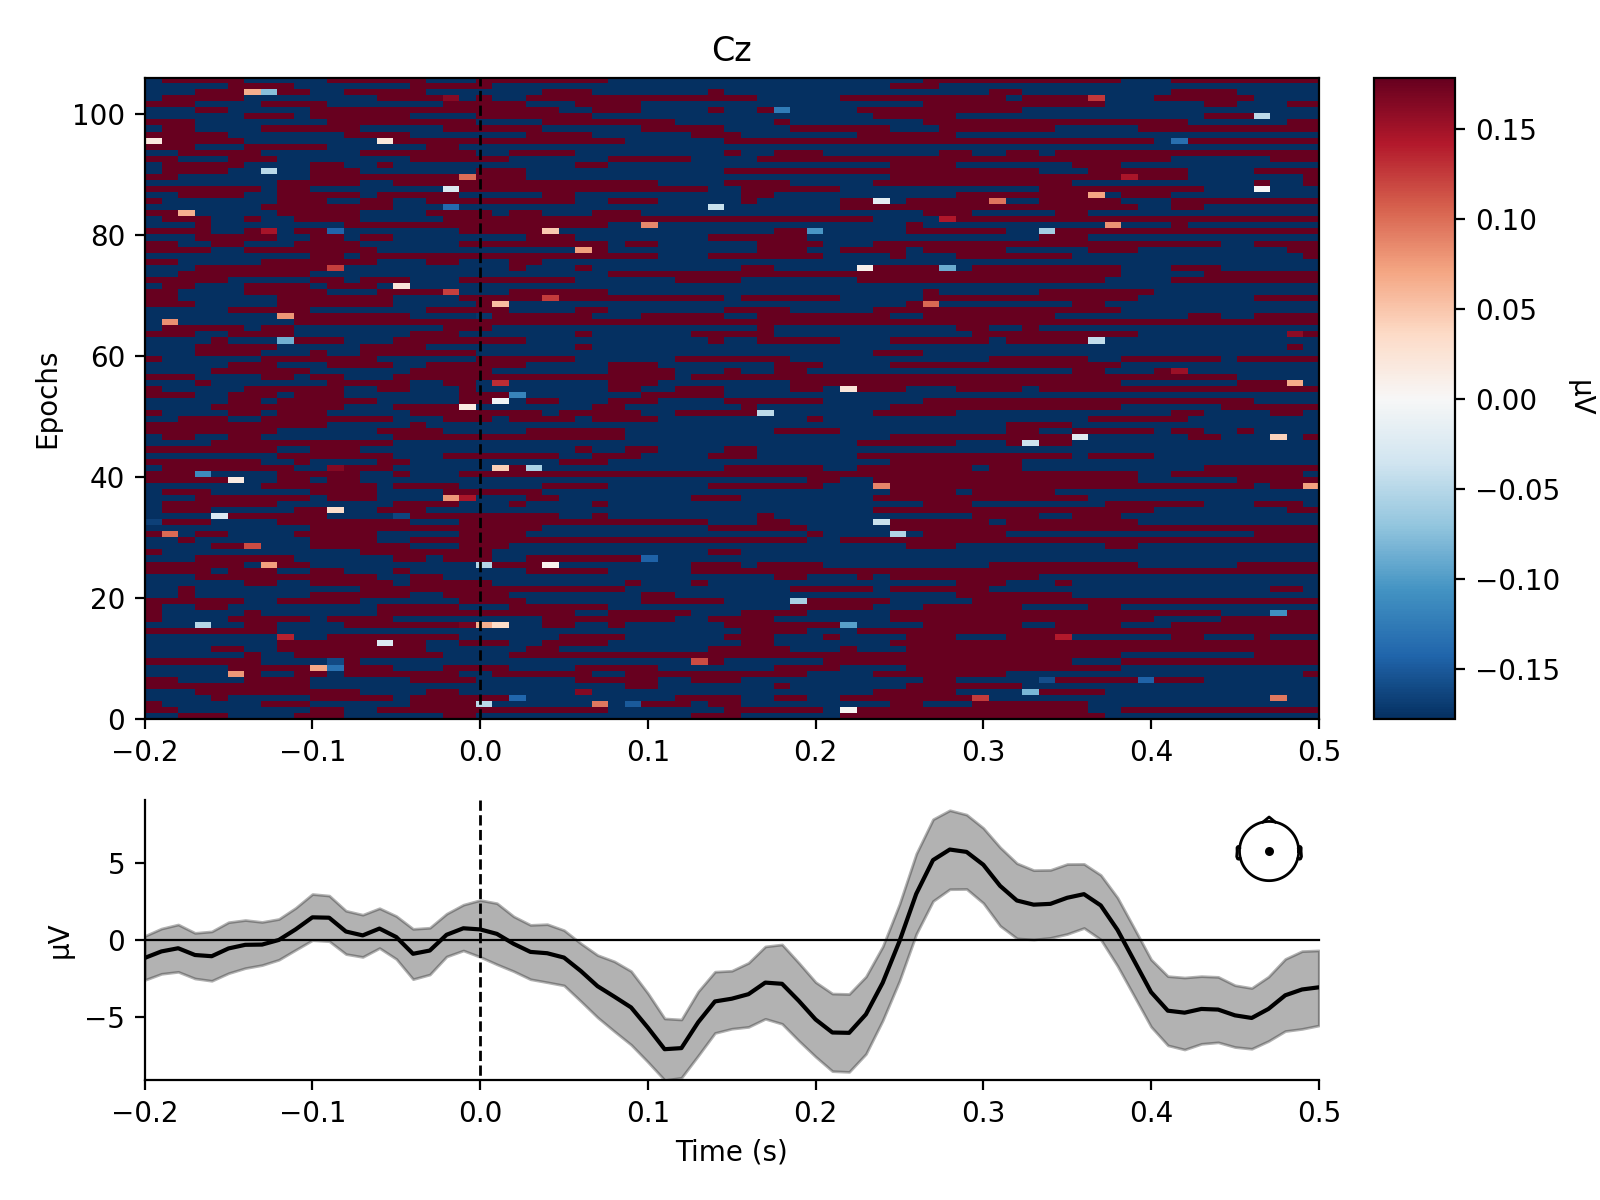

Not setting metadata
106 matching events found
No baseline correction applied
0 projection items activated


In [84]:
plt.rcParams['figure.figsize']= 8,6
epochs["target"].plot_image(picks=[13]);

In [82]:
epochs.equalize_event_counts(event_ids) # 이벤트 시행횟수 균등화
epochs

Dropped 691 epochs: 0, 1, 2, 3, 4, 5, 6, 9, 12, 13, 14, 15, 18, 19, 20, 21, 24, 25, 26, 27, 28, 29, 30, 33, 34, 35, 36, 39, 40, 41, 42, 43, 44, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 59, 60, 61, 62, 63, 64, 65, 66, 69, 70, 71, 72, 73, 74, 75, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 104, 107, 108, 109, 110, 113, 114, 115, 116, 117, 118, 121, 122, 123, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 141, 142, 143, 146, 147, 148, 149, 150, 151, 154, 155, 156, 157, 158, 159, 160, 161, 162, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 187, 188, 193, 194, 197, 198, 199, 200, 201, 202, 203, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 248, 249, 252, 253, 254, 257, 260, 261, 262, 263, 266, 267, 268, 269, 270, 271, 274, 275, 276, 277, 278, 279, 280,

<Epochs |  212 events (all good), -0.2 - 0.5 sec, baseline -0.2 – 0 sec, ~7.4 MB, data loaded,
 'standard/stim': 106
 'target/stim': 106>

In [83]:
epochs.save("oddball-epo.fif") 

FileExistsError: Destination file exists. Please use option "overwrite=True" to force overwriting.

In [ ]:
X = epochs.get_data()
X.shape